In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
import keras

Using TensorFlow backend.


In [4]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv')

In [9]:
symbol = 'EUR='
df = pd.DataFrame(raw[symbol])
df.rename(columns={symbol:'price'}, inplace=True)

In [10]:
df.head()

,price
0,1.4323
1,1.4411
2,1.4368
3,1.4412
4,1.4318


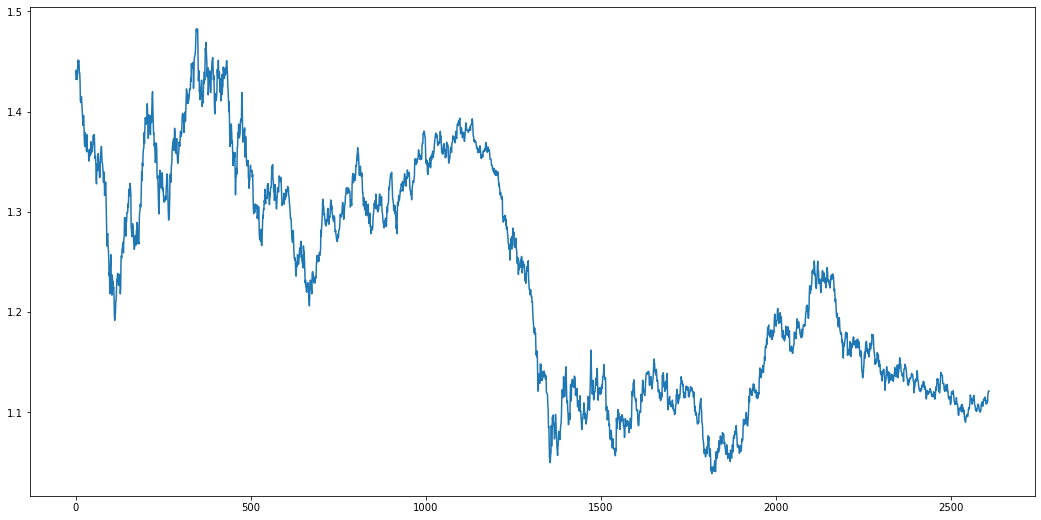

In [11]:
plt.figure(figsize=(18, 9))
plt.plot(range(df.shape[0]), df['price'])

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
sc = MinMaxScaler(feature_range=(0, 1))

In [32]:
df_values = df['price'].values

In [34]:
df_scaled = sc.fit_transform(df)

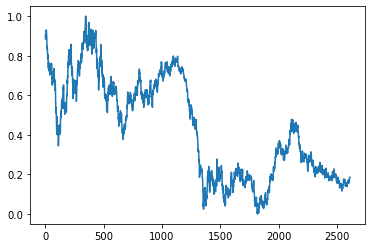

In [38]:
plt.plot(df_scaled)

In [23]:
len(df_scaled)

2609

In [43]:
df_scaled.shape

(2609, 1)

In [54]:
df.shape

(2609, 1)

In [45]:
# LSTM need 3D array data - create data in 60 timesteps -> convert to nparray
# convert to 3D array - X_train samples, 60 timestamps, one feature at each step
# 
X_train = []
y_train = []
for i in range(60,len(df_scaled)):
    X_train.append(df_scaled[i-60: i, 0])
    y_train.append(df_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [46]:
X_train.shape

(2549, 60, 1)

In [27]:
from keras.models import Sequential # initializing neural network
from keras.layers import Dense # Densely connected NN layer
from keras.layers import LSTM
from keras.layers import Dropout # prevent overfitting 

In [48]:
# doing it as a LINEAR (?) regression problem? WHY NOT LOGISTIC REGRESSION
reg = Sequential()

reg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2)) # drop 20% of the layers

reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

reg.add(Dense(units = 1))

reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

reg.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
2549/2549 [==============================] - 9s 4ms/step - loss: 0.0170
Epoch 2/10
2549/2549 [==============================] - 8s 3ms/step - loss: 0.0056
Epoch 3/10
2549/2549 [==============================] - 8s 3ms/step - loss: 0.0045
Epoch 4/10
2549/2549 [==============================] - 9s 4ms/step - loss: 0.0043
Epoch 5/10
2549/2549 [==============================] - 10s 4ms/step - loss: 0.0042
Epoch 6/10
2549/2549 [==============================] - 9s 4ms/step - loss: 0.0039
Epoch 7/10
2549/2549 [==============================] - 9s 4ms/step - loss: 0.0035
Epoch 8/10
2549/2549 [==============================] - 9s 3ms/step - loss: 0.0034
Epoch 9/10
2549/2549 [==============================] - 9s 4ms/step - loss: 0.0030
Epoch 10/10
2549/2549 [==============================] - 9s 4ms/step - loss: 0.0027


In [49]:
# above was the training to create model 

In [50]:
# test set - please do it properly next time 

In [56]:
test_data = df_scaled[1900: ,:] # 1900 is roughly 75% of data available

x_test = []
y_test = df_values[1900 : ] # DIFFERENT FROM SOURCE

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60: i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [57]:
predictions = reg.predict(x_test)

In [58]:
# undo scaling 
predictions = sc.inverse_transform(predictions)

In [60]:
# calculate RMSE score 
rmse = np.sqrt(np.mean((predictions - y_test)** 2))
rmse

0.054858362913745684

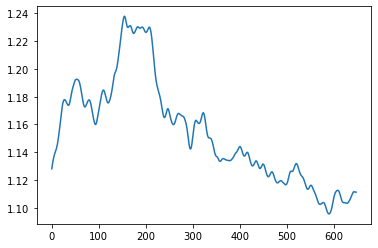

In [61]:
plt.plot(predictions)


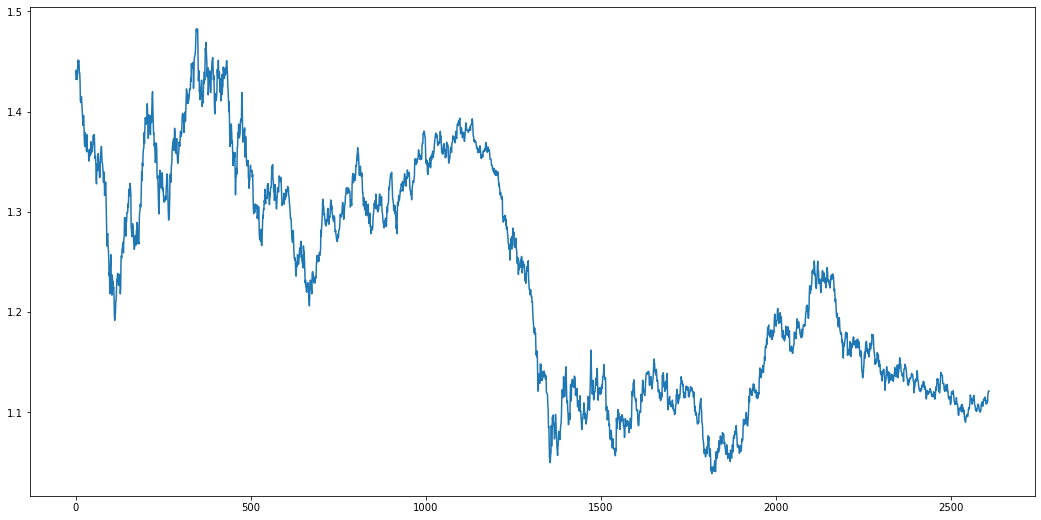

In [62]:
plt.figure(figsize=(18, 9))
plt.plot(range(df.shape[0]), df['price'])

In [64]:
from sklearn.metrics import accuracy_score

In [73]:
y_test2 = np.roll(y_test, 1)
true_trend = y_test2 > y_test

predictions2 = np.roll(predictions, 1)
pred_trend = predictions2 > predictions

In [82]:
accuracy_score(true_trend[-648:], pred_trend[1:])

0.4645061728395062

In [77]:
len(predictions)

649

In [80]:
len(y_test[-649:])

649